<a href="https://colab.research.google.com/github/threegenie/studying_pytorch/blob/main/08_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC%EC%9D%98_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, sys

In [2]:
%%capture
!pip install nltk

In [3]:
import nltk
from nltk.tokenize import word_tokenize

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

> 한국어 예시 문장

In [5]:
kor_text = '인터넷뱅킹을 통해 이체한도 감액 신청 가능한 이용 경로 안내해드리겠습니다. 회원님의 이메일 주소를 알려주시면 바로 답신 드릴테니 문자 주시면 감사하겠습니다.'

> 한국어 띄어쓰기 토큰화

In [6]:
# 한국어 띄어쓰기 토큰화
print(kor_text.split())

['인터넷뱅킹을', '통해', '이체한도', '감액', '신청', '가능한', '이용', '경로', '안내해드리겠습니다.', '회원님의', '이메일', '주소를', '알려주시면', '바로', '답신', '드릴테니', '문자', '주시면', '감사하겠습니다.']


> 한국어 형태소 토큰화

colab에 konlpy + mecab 설치 - 
https://zetawiki.com/wiki/Colab%EC%97%90_konlpy_%2B_mecab_%EC%84%A4%EC%B9%98

In [7]:
%%capture
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

In [8]:
import konlpy
from konlpy.tag import Mecab

In [9]:
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['인터넷', '뱅킹', '을', '통해', '이', '체한', '도', '감액', '신청', '가능', '한', '이용', '경로', '안내', '해', '드리', '겠', '습니다', '.', '회원', '님', '의', '이메일', '주소', '를', '알려', '주', '시', '면', '바로', '답신', '드릴', '테', '니', '문자', '주', '시', '면', '감사', '하', '겠', '습니다', '.']


> 한국어 단어 집합 생성
- 네이버 영화 리뷰 분류 데이터 이용 - 총 20만개 영화 리뷰, 긍정 1 부정 0으로 라벨링

In [10]:
import urllib.request
from nltk import FreqDist

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt') # 데이터프레임에 저장
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [12]:
sample_data = data[:100] # 임의로 100개만 저장

In [13]:
# 불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [14]:
tokenizer = Mecab()

In [15]:
tokenized=[]
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [16]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', ',', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '.', '.', '최고', '.'], ['.', '.', '연기', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화', '.'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [17]:
# 단어 집합 형성 - freqdist를 사용하여 빈도수 계산
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 698


In [18]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존 - 상위 500개로 설정 
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [19]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)} #2부터 501까지 인덱싱
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [20]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [21]:
print(encoded[:10])

[[84, 32, 10, 5, 54, 46, 85, 18, 33, 34], [201, 6, 86, 202, 19, 203, 204, 55, 205, 122, 6, 206, 207, 20, 123, 208, 209, 15, 2, 56, 87, 124, 35, 55, 210, 125, 126, 36, 211, 6, 212, 213, 21, 122, 8, 72, 57, 21, 47, 214, 6, 215, 5, 216, 16, 8, 88, 37, 217, 89, 2], [218, 127, 219, 90, 58, 220, 36, 221, 222, 59, 11, 28, 2, 2, 12, 2], [2, 2, 48, 38, 128, 223, 224, 2, 2, 225, 226, 73, 49, 39, 15, 227, 129, 17, 3, 2, 2, 228, 74, 9, 38, 4, 40], [229, 230, 231, 232, 8, 233, 21, 4, 2], [130, 6, 20, 41, 47, 131, 132, 58, 126, 36, 91, 6, 16, 8, 4], [133, 42, 234, 46, 85, 42], [128, 235, 134, 60, 236, 29, 60, 92, 90, 237, 50, 10, 5, 51, 28], [61], [238, 93, 94, 239, 240, 62, 95]]


리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 15.620000


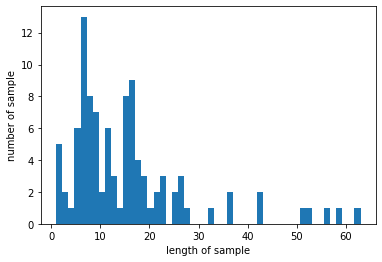

In [22]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [23]:
# 길이가 다른 문장들을 전부 동일한 길이로 변환 - 패딩
# 여기서는 가장 길이가 긴 리뷰의 길이가 63이므로 63으로 통일
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [24]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 63
리뷰의 최소 길이 : 63
리뷰의 평균 길이 : 63.000000


In [25]:
print(encoded[:3])

[[84, 32, 10, 5, 54, 46, 85, 18, 33, 34, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [201, 6, 86, 202, 19, 203, 204, 55, 205, 122, 6, 206, 207, 20, 123, 208, 209, 15, 2, 56, 87, 124, 35, 55, 210, 125, 126, 36, 211, 6, 212, 213, 21, 122, 8, 72, 57, 21, 47, 214, 6, 215, 5, 216, 16, 8, 88, 37, 217, 89, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [218, 127, 219, 90, 58, 220, 36, 221, 222, 59, 11, 28, 2, 2, 12, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
